In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molmodmt as m3t
import openpocket as op
import numpy as np
import seaborn as sns
import nglview as nv
from simtk.unit import nanometers

_ColormakerRegistry()

# Alpha sphere

In [3]:
n_atoms = 5

In [4]:
coordinates = np.zeros([1,n_atoms,3],dtype='float64')*nanometers

In [5]:
coordinates[0,0,:] = [1,3,5]*nanometers
coordinates[0,1,:] = [0,-2,1]*nanometers
coordinates[0,2,:] = [-1,3,-2]*nanometers
coordinates[0,3,:] = [2,3,-1]*nanometers
coordinates[0,4,:] = [-3,-1,4]*nanometers

In [8]:
alpha_spheres = op.get_alpha_spheres_set(coordinates)

In [9]:
alpha_spheres.centers

Quantity(value=array([[-1.09701493,  1.76865672,  1.81343284],
       [-0.55263158,  1.78421053,  1.65789474]]), unit=nanometer)

In [10]:
alpha_spheres.radii

Quantity(value=array([4.00847704, 3.88052528]), unit=nanometer)

In [11]:
alpha_spheres.points_of_alpha_sphere

array([[0, 1, 2, 4],
       [0, 1, 2, 3]])

In [13]:
view = alpha_spheres.view()
view

NGLWidget()

## protein

In [15]:
molsys = m3t.load('mmtf:1TCD')

In [17]:
m3t.select(molsys, 'molecule.type=="protein" and atom.type!="H"') #heavy atoms

array([   0,    1,    2, ..., 3815, 3816, 3817])

In [25]:
aspheres = op.get_alpha_spheres_set(molsys, selection='molecule.type=="protein" and atom.type!="H"')

AttributeError: 'AxesSubplot' object has no attribute 'show'

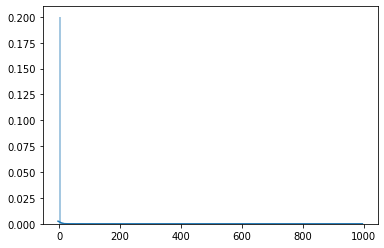

In [37]:
plt = sns.distplot(aspheres.radii, bins=200, norm_hist=False)
plt.show()

In [ ]:
min_apol_neigh = 3 # Todavia no se lo que es

In [ ]:
clusters = op.clustering.distance_between_vertices(alpha_spheres_set, threshold = 0.18*nanometers)

In [ ]:
clusters = alpha_spheres_set.removing_least_populated_clusters(clusters, threshold = 1)

In [ ]:
clusters = op.clustering.neighbor_points_connectivity(alpha_spheres_set)

In [ ]:
view = nv.NGLWidget()

for index in range(n_atoms):
    atom_coordinates = coordinates[0,index,:]._value
    view.shape.add_sphere(list(atom_coordinates), [0.8,0.0,0.0], 0.2)

for index in range(alpha_spheres.n_alpha_spheres[0]):
    sphere_coordinates = alpha_spheres.vertices[0][index,:]._value
    sphere_radius = alpha_spheres.radii[0][index]._value
    view.shape.add_sphere(list(sphere_coordinates), [0.8,0.8,0.8], sphere_radius)
    
view

### Sources, cites and additional information

https://plot.ly/python/alpha-shapes/   
http://www.nyu.edu/projects/yzhang/AlphaSpace/index.html   
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Voronoi.html   
https://stackoverflow.com/questions/10650645/python-calculate-voronoi-tesselation-from-scipys-delaunay-triangulation-in-3d   
http://www.qhull.org/   
https://docs.scipy.org/doc/scipy-0.18.1/reference/spatial.html   
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.ConvexHull.html   

